In [292]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvMoSa

boundingRectMoSa and contourAreaMoSa

In [293]:
image_org = cv2.imread('input/puma.jpg')
image_dice = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY)
image_Blur = cv2.medianBlur(image_dice, 7)
_, image_thresh = cv2.threshold(image_Blur, 180, 255, cv2.THRESH_BINARY)
contours, hierarch = cv2.findContours(image_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2 Area: 21256.5
points length: 21282
cvMoSa area: 21282
accuracy: 99.8800366946581 %


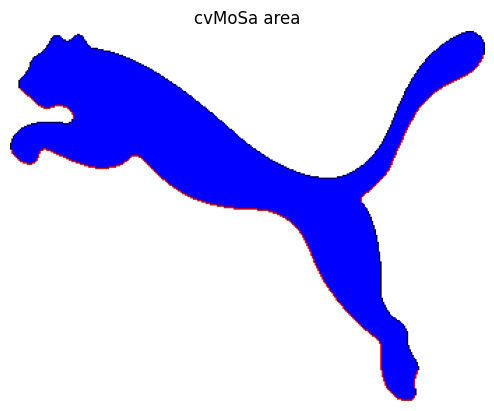

In [294]:
n = 9
contourM = contours[n]

x, y, w, h = cvMoSa.boundingRectMoSa(contours[n])

area, points = cvMoSa.contourAreaMoSa(contourM)
image = np.ones((h,w,3),dtype= np.uint8)*255
contourM = contourM[:,0]
for pixel in contourM:
    image[pixel[1]-y,pixel[0]-x,1:3] = 0
for pixel in points:
    image[pixel[1]-y,pixel[0]-x,0:2] = 0

cv2Area = cv2.contourArea(contourM)
print('cv2 Area:',cv2Area)
print('points length:',len(points))
print('cvMoSa area:',area)
print('accuracy:',(1 - abs(cv2Area - area)/cv2Area)*100,'%')
plt.imshow(image)
plt.title('cvMoSa area')
plt.axis('off')
plt.show()

findContoursMoSa

In [295]:
image_org_wolf = cv2.imread('input/dice1.png')
image_wolf = cv2.cvtColor(image_org_wolf, cv2.COLOR_BGR2GRAY)
image_wolf = cv2.medianBlur(image_wolf, 7)
_, image_thresh_wolf = cv2.threshold(image_wolf, 180, 255, cv2.THRESH_BINARY)
contours_w, _= cv2.findContours(image_thresh_wolf, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
print(len(contours_w))

30


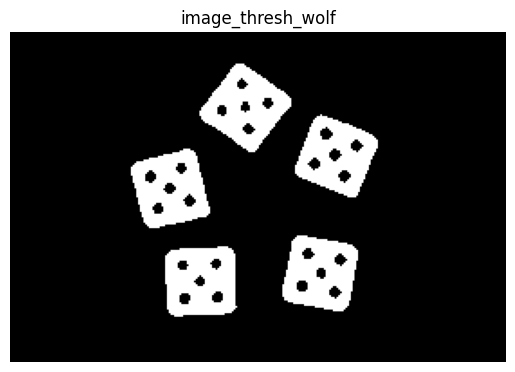

In [296]:
plt.imshow(image_thresh_wolf, cmap='gray')
plt.title('image_thresh_wolf')
plt.axis('off')
plt.show()

In [297]:
n = 4
contourM = contours_w[n]

x, y, w, h = cvMoSa.boundingRectMoSa(contours_w[n])

rows, cols = image_thresh_wolf.shape
image = np.ones((rows,cols,3),dtype= np.uint8)*255
image_new = np.zeros((rows, cols),dtype= np.uint8) 

kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

FS = kernel.shape[0]-1
for i in range(FS//2, rows-FS//2):
    for j in range(FS//2, cols-FS//2):
        small = image_thresh_wolf[(i-FS//2):(i+FS//2+1),(j-FS//2):(j+FS//2+1)]
        average = np.sum(kernel * small)
        image_new[i, j] = average
_, image_new = cv2.threshold(image_new, 250, 255, cv2.THRESH_BINARY)

        
contourM = contourM[:,0]


In [298]:
contourM.shape

(18, 2)

In [299]:
contourMoSa = []
for i in range(FS//2, rows-FS//2):
    for j in range(FS//2, cols-FS//2):
        if image_new[i,j] == 255:
            contourMoSa.append([i,j])

for pixel in contourMoSa:
    i = pixel[0]
    j = pixel[1]
    if ([i, j-1] in contourMoSa or [i, j+1] in contourMoSa) and ([i-1, j] in contourMoSa or [i+1, j] in contourMoSa):
        contourMoSa.remove([i, j])

def checkVicitiny(A, B):
    return (abs(A[0] - B[0]) < 2 and abs(A[1] - B[1]) < 2)

lenContourMoSa = len(contourMoSa)
Correlation = np.zeros((lenContourMoSa, lenContourMoSa),dtype= np.bool_)
CorrelationList = np.ones((lenContourMoSa*5, lenContourMoSa*5),dtype= np.uint16)*(lenContourMoSa+10)
counter = 0
for i in range(lenContourMoSa):
    for j in range(i):
        if checkVicitiny(contourMoSa[i], contourMoSa[j]):
            CorrelationList[counter, 0] = i
            CorrelationList[counter, 1] = j
            counter += 1

print(f'counter: {counter}')

for i in range(counter):
    if i % 100 == 0:
        print(i, end='-')

    for j in range(i + 1, counter):
        if len(np.intersect1d(CorrelationList[i, :], CorrelationList[j, :])) > 1:
            a = np.where(CorrelationList[i, :] == (lenContourMoSa+10))
            b = np.where(CorrelationList[j, :] == (lenContourMoSa+10))
            CorrelationList[i, a[0][0]:(a[0][0]+b[0][0])] = CorrelationList[j, 0:b[0][0]]
            CorrelationList[j, :] = (lenContourMoSa+10)




counter: 1145
0-100-200-300-400-500-600-700-800-900-1000-1100-

In [300]:
CorrelationList[0,2000]

1143

In [301]:
g = 0
for i in range(counter):
    if CorrelationList[i,0] != (lenContourMoSa+10):
        g += 1
        print(CorrelationList[i,0], end=' - ')

print('')
print(f'g: {g}')

1 - 24 - 66 - 77 - 90 - 147 - 166 - 197 - 198 - 256 - 294 - 300 - 327 - 339 - 348 - 353 - 358 - 371 - 381 - 385 - 422 - 431 - 501 - 569 - 594 - 640 - 646 - 650 - 655 - 661 - 668 - 676 - 711 - 717 - 721 - 748 - 763 - 783 - 794 - 849 - 891 - 912 - 943 - 967 - 978 - 1100 - 1107 - 
g: 47


In [302]:
CorrelationList2 = np.ones((g, lenContourMoSa*5),dtype= np.uint16)*(lenContourMoSa+10)
g = 0
for i in range(counter):
    if CorrelationList[i,0] != (lenContourMoSa+10):
        CorrelationList2[g,:] = CorrelationList[i,:]
        g += 1

In [303]:
for i in range(g):
    data = np.unique(CorrelationList2[i,:])
    CorrelationList2[i,:len(data)] = data
    CorrelationList2[i,len(data):] = (lenContourMoSa+10)

In [304]:
CorrelationList3[0,2000]

1143

In [305]:
f= 0
need_to_pop = []
need_to_pop2 = []
for i in range(g):
    for j in range(i+1,g):
        if len(np.intersect1d(CorrelationList2[i,:], CorrelationList2[j,:])) > 1:
            need_to_pop.append([i,j])
            need_to_pop2.append(j)
            f += 1

CorrelationList3  = CorrelationList2

In [306]:
CorrelationList4 = []
for i in range(len(need_to_pop)-1,-1,-1):    
    a = np.where(CorrelationList[i, :] == (lenContourMoSa+10))
    b = np.where(CorrelationList[j, :] == (lenContourMoSa+10))
    CorrelationList3[need_to_pop[i][0], a[0][0]:(a[0][0]+b[0][0])] = CorrelationList3[j, 0:b[0][0]]
for i in range(len(CorrelationList3)):
    if not i in need_to_pop2:
        CorrelationList4.append(CorrelationList3[i])

In [308]:
len(CorrelationList4)

30

In [320]:
contourMoSab = []
for i in range(len(CorrelationList4)):
    contourTemp = []
    a = np.where(CorrelationList4[i] == (lenContourMoSa+10))
    # index = CorrelationList4[i].index(lenContourMoSa+10)
    for j in range(a[0][0]):
        n = CorrelationList4[i][j]
        contourTemp.append([contourMoSa[n][0],contourMoSa[n][1]])
    contourMoSab.append(contourTemp)

In [322]:
CorrelationList4[0][j]

19

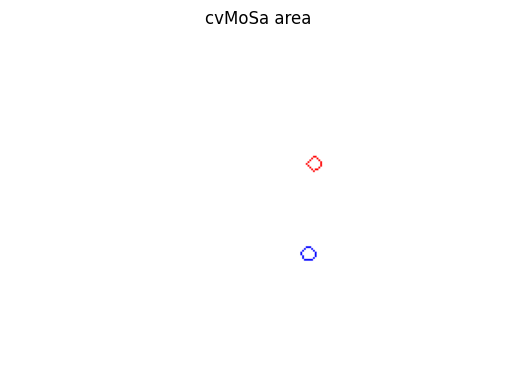

In [340]:
n = 20
contourM = contours_w[n]
contourM = contourM[:,0]
contourMoSab0 = contourMoSab[n]
image = np.ones((rows,cols,3),dtype= np.uint8)*255
for pixel in contourM:
    image[pixel[1],pixel[0],1:3] = 0
for pixel in contourMoSab0:
    image[pixel[0],pixel[1],0:2] = 0
    
plt.imshow(image)
plt.title('cvMoSa area')
plt.axis('off')
plt.show()